<a href="https://colab.research.google.com/github/afnu86/my_project/blob/main/Logistic_regression_23it003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


,age
10,18
4,46
12,27
1,25
21,26
16,25


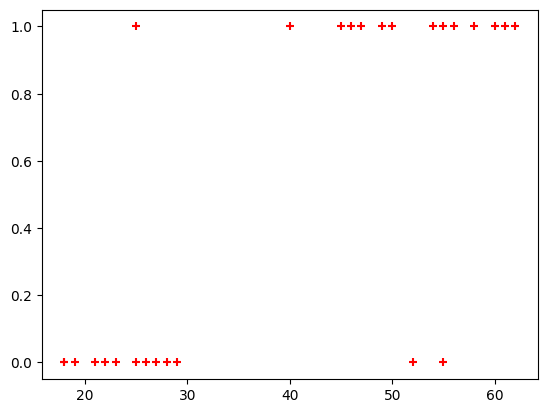

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

X_test

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
X_test
y_predicted = model.predict(X_test)
model.score(X_test,y_test)
y_predicted
X_test
model.coef_
model.intercept_

array([-6.38762824])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
   z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
   y = sigmoid(z)
   return y
age = 35
prediction_function(age)

age = 43
prediction_function(age)

0.568565299077705

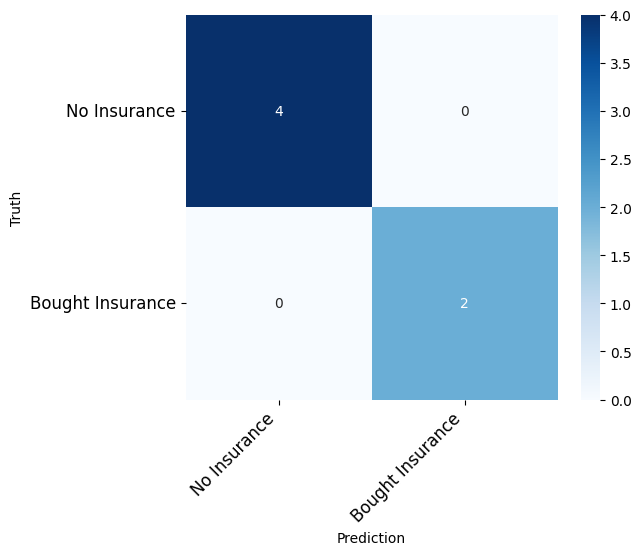

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("insurance_data.csv")

# 3. Train-test split
X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# 4. Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_predicted = model.predict(X_test)

# 6. Confusion Matrix + Plot
def print_confusion_matrix(confusion_matrix, class_names, figsize=(6,5), fontsize=12):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    heatmap.yaxis.set_ticklabels(
        heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize
    )
    heatmap.xaxis.set_ticklabels(
        heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize
    )
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.show()

cm = confusion_matrix(y_test, y_predicted)
print_confusion_matrix(cm, ["No Insurance", "Bought Insurance"])

# 7. Classification Report
print(classification_report(y_test, y_predicted))